In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
from numba import jit
import random

def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [22]:
%time monte_carlo_pi(10000)

Wall time: 7 ms


3.1368

In [23]:
monte_carlo_pi_jit = jit()(monte_carlo_pi)  

In [25]:
%time monte_carlo_pi_jit(10000) # you have to execute the function at least one time to compile it

Wall time: 1e+03 µs


3.1772

## Time to create list

In [ ]:
size = 1000000

In [91]:
%time a1 = [i for i in range(size)]
%time a2 = np.arange(size)

Wall time: 85 ms
Wall time: 1 ms


In [92]:
%time b1 = [None] * size
%time b2 = np.zeros(size)
%time b3 = np.zeros_like(size)

Wall time: 8 ms
Wall time: 1e+03 µs
Wall time: 0 ns


The difference between np.zeros and np.zeros_like is that with np.zeros_like we can create it also using an existent list and it becomes of the same size of the list, all values are zeros. With np.zeros this is not possibile. 

In [88]:
np.zeros_like(b1)

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [143]:
import numpy as np

def withoutNumba(inputList):
    for i in range(inputList.size):
        sum = 0
        for j in range(inputList.size):
            if j==0:
                sum += 0
            else:
                sum +=  int(i/j)
        inputList[i] = sum

@jit(nopython=True)
def withNumba(inputList):
    for i in range(inputList.size):
        sum = 0
        for j in range(inputList.size):
            if j==0:
                sum += 0
            else:
                sum +=  int(i/j)
        inputList[i] = sum  

In [144]:
inputList = np.arange(10000)

In [146]:
%time withoutNumba(inputList)
%time withNumba(inputList)

Wall time: 24.4 s
Wall time: 456 ms


In [147]:
@jit(nopython=True)
def noAllocated(inputList):
    output_list = []
    for i in range(inputList.size):
        sum = 0
        for j in range(inputList.size):
            if j==0:
                sum += 0
            else:
                sum +=  int(i/j)
        output_list.append(sum)
        
    return output_list[0:5]

@jit(nopython=True)
def allocated(inputList):
    output_list = np.zeros_like(inputList)
    for i in range(output_list.size):
        sum = 0
        for j in range(output_list.size):
            if j==0:
                sum += 0
            else:
                sum +=  int(i/j)
        output_list[i] = sum
        
    return output_list[0:5]

In [151]:
%time noAllocated(inputList)
%time allocated(inputList)

Wall time: 455 ms
Wall time: 442 ms


array([0, 1, 3, 5, 8])

In [190]:
import cv2
from matplotlib import pyplot as plt

@jit(nopython=True)
def test(img):
    img+=1

def testNoNumba(img):
    img+=1

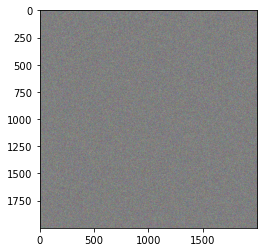

In [196]:
black = np.random.random((2000,2000,3))
plt.imshow(black)
plt.show()

In [199]:
%time test(black) # this is not better...

Wall time: 28 ms


In [198]:
%time testNoNumba(black)

Wall time: 11 ms
